<a href="https://colab.research.google.com/github/Nahuel-Ramirez/data-analytics/blob/main/estadistica6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo matematico

Es una representacion simplificada de un sistema real mediante ecuaciones o formulas.

### Trade off bias-variance

El error debido al sesgo de un modelo es simplemente la diferencia entre el valor esperado y el valor real.

Cuando se dice que un modelo tiene un bias alto quiere decir que el modelo es muy simple (no se ajusta correctamente a los datos) --> **underfitting** (falta de entrenamiento)

Los modelos lineales suelen sufrir errores de Bias (sesgo)

**Varianza**: Es cuanto varia la prediccion segun los datos que tengamos. 

Cuando tengo varianza baja, yo cambio mis datos con los que entreno mi modelo y la prediccion no cambia mucho.

Cuanto tengo varianza alta, cambio mis datos, la prediccion cambia significativamente.



##Regresion lineal Simple

- Funcion Lineal:
y = a*x + b

El objetivo de la regresion lineal es minimizar funciones.

El objetivo es agarrar la recta y minimizar el error entre la recta y los valores reales. La suma de los errores tiene que ser la minima posible.

##Regresion lineal multiple

Tengo multiples features.

Y = A + a1 * x1 + a2 * x2 + .... an * xn

A = Vector

x = cantidad de entradas que tengo

##MSE

Error = |Yp - Yr| = 3 - 5 = |-2| = 2 El modulo es para ver el valor positivo.

Esta metrica no se usa mucho

### mean squared error (MSE)

En estadistica, el error cuadratico medio o MSE de un estimador mide el promedio de los errores al cuadrado.

MSE = (1/N) * Sumatoria([yp - yr]^2) --> El MSE debe ser el mas chico posible.

(Algoritmo descenso por gradiente = para minizar funciones de costos)



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
X = np.array([45000,3000,3100,30000,14000,50000,16000,70000])
y_house_price = np.array([65000,10000,9500,15000,30000,100000,28000,150000])
#La cantidad de filas coinciden con las columnas.
#Las dimensiones entre lo que queremos comparar, entre entrada y salida, sean iguales. Porque no se puede dibujar un punto con un solo valor. Tiene que haber un valor de X y otro de Y.

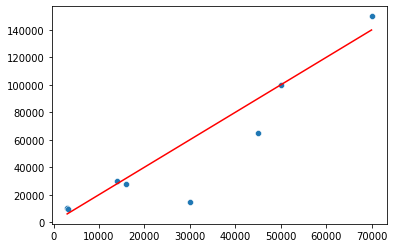

In [8]:
##Scatter plot

sns.scatterplot(x=X, y=y_house_price)
sns.lineplot(x=X, y=2*X, color="red")

## Regresion linear con Sklearn

In [9]:
# Grados fahrenheit F - 32 = C * 1.8 = Y = 1.6*X + 32

celsius = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit = np.array([-40,14,32,46,59,72,100], dtype=float)

#Datos para entrenar al modelo. El modelo tiene que poder predecir la formula de los grados de Fahrenheit.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
X = celsius.reshape(-1,1) #Transforma un vector a un vector columna. La linearRegression acepta solo vectores comunes.
Y = fahrenheit.reshape(-1,1)

lr = LinearRegression()
lr
#Devuelve un objeto de tipo LinearRegression, a esto  hay que entrenarlo

LinearRegression()

###Entrenamiento del modelo

Esto agarra la recta, genera a traves de algoritmo iterativo que es el descenso por gradiente, agarrar la curva de error cuadratico medio que es la funcion de costo de modelo lineal y minimizarla



```
# lr = LinearRegression()
# model = lr.fit(x,y)
```

In [11]:
model = lr.fit(X,Y)

In [12]:
m = model.coef_
m #Es la pendiente de la recta, se acerca bastante al 1.8 de la formula de grados Fahrenheit, por lo cual pudo predecirlo con un margen de error.

array([[1.79794911]])

In [13]:
b = model.intercept_
b #Se acerca bastante al 32 de la formula de Fahrenheit

array([31.95252564])

In [19]:
print("m-->", m)
print("b -->", b)
#plasmo en una recta los valores predichos por mi modelo.

y = m[0][0]*X + b[0]

m--> [[1.79794911]]
b --> [31.95252564]


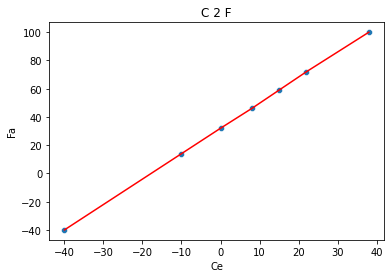

In [16]:
plt.xlabel("Ce")
plt.ylabel("Fa")
plt.title("C 2 F")
sns.lineplot(x=celsius, y=fahrenheit, color="red")
sns.scatterplot(x=celsius, y=fahrenheit)

In [23]:
#Calculando mean squared error
# El error es el valor entre el valor predicho (recta) y el valor real (puntitos)



mse = mean_squared_error(y,fahrenheit)
print("MSE:",mse) #El error es bajo, que es lo que queremos lograr.

MSE: 0.06304595518420045


# R^2

**Coeficiente de determinacion**

Es una medida usada para explicar cuanda variabilidad hay entre dos variables. Se conoce como bondad de ajuste y se representa con un valor entre 0 y 1.

Cuanto mayor sea ente coeficiente, indica que el ajuste es mas preciso.
r^2 = 1, correlacion perfecta, modelo super fiable.

In [24]:
#Nuestro modelo es muy fiable.
r2 = r2_score(y,fahrenheit)
print("r2:",r2) 

r2: 0.9999637049281158


In [26]:
df = pd.DataFrame({"celsius":celsius, "fahrenheit":fahrenheit})
df

,celsius,fahrenheit
0,-40.0,-40.0
1,-10.0,14.0
2,0.0,32.0
3,8.0,46.0
4,15.0,59.0
5,22.0,72.0
6,38.0,100.0


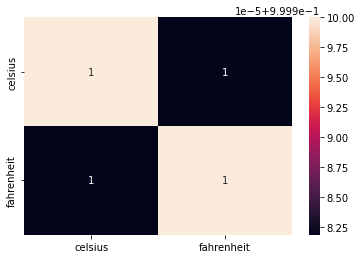

In [29]:
sns.heatmap(df.corr(method="pearson"), annot=True) #Relacion 1, relacion perfecta.

In [1]:
#Otro ejemplo de mapa de calor

from sklearn.datasets import fetch_california_housing
california_housing_ds = fetch_california_housing()

In [8]:
houses_data = pd.DataFrame(data=california_housing_ds.data, columns=california_housing_ds.feature_names)
houses_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
#Predecir el precio de la casa.

houses_data['price'] = california_housing_ds.target
houses_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


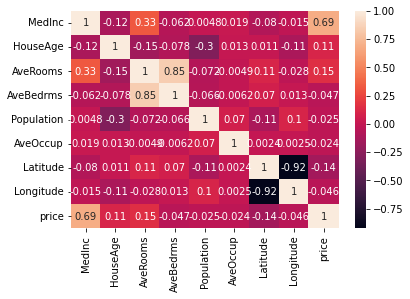

In [10]:
sns.heatmap(houses_data.corr(), annot=True)

#Siempre elijo la variable que este mas alejada del 0.
#Valor positivo = Relacion directa
#Valor negativo = relacion inversa